# .h5 dataset examination

## Why?

To figure out what's inside and in which format.

In [96]:
import os
import os.path as osp

import cv2
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pickle
from PIL import Image

%matplotlib inline

In [16]:
# Setup image size for rescaling
HEIGHT = 1280 //2
WIDTH = 720   //2

# Setup paths for directories
SYNTHTEXT = '../'
DATA_PATH = '../data/images'
RAW_PATH = osp.join(DATA_PATH, 'raw')
DEPTHS_PATH = osp.join(DATA_PATH, 'depths')
SEGS_PATH = osp.join(DATA_PATH, 'segs')
LABELS_PATH = osp.join(DATA_PATH, 'labels')
RESULTS_PATH = osp.join(DATA_PATH, 'results')

# Setup paths for datasets
DEPTHS_DATASET_PATH = osp.join(DEPTHS_PATH, 'depths.h5')
SEGS_DATASET_PATH = osp.join(SEGS_PATH, 'segs.h5')
LABELS_DATASET_PATH = osp.join(LABELS_PATH, 'labels.h5')
INPUT_DATASET_PATH = osp.join(DATA_PATH, 'dset.h5')
OUTPUT_DATASET_PATH = osp.join(RESULTS_PATH, 'SynthText.h5')

In [154]:
# Show what's in the directory we are in
!ls -lh ../data/images
!ls -lh ../data/images/raw | wc
!ls -lh ../data/images/depths
!ls -lh ../data/images/segs
!ls -lh ../data/images/labels 
!ls -lh ../data/images/results

итого 7,1G
drwxrwxr-x 2 gayduchenko gayduchenko 4,0K ноя  7 01:25 depths
-rw-rw-r-- 1 gayduchenko gayduchenko 7,1G ноя  7 03:28 dset.h5
drwxrwxr-x 2 gayduchenko gayduchenko 4,0K ноя  7 00:00 labeled
drwxrwxr-x 2 gayduchenko gayduchenko 4,0K ноя  7 03:12 labels
drwxrwxr-x 2 gayduchenko gayduchenko 4,0K ноя  7 00:00 raw
drwxrwxr-x 2 gayduchenko gayduchenko 4,0K ноя  7 00:00 raw_multiplied
drwxrwxr-x 2 gayduchenko gayduchenko  64K ноя  7 00:00 raw_transformed
drwxrwxr-x 2 gayduchenko gayduchenko 4,0K ноя  7 03:38 results
drwxrwxr-x 2 gayduchenko gayduchenko 4,0K ноя  7 03:10 segs
drwxrwxr-x 2 gayduchenko gayduchenko 4,0K ноя  7 00:00 spoiled
    201    1802   14220
итого 180M
-rw-rw-r-- 1 gayduchenko gayduchenko 180M ноя  7 01:37 depths.h5
итого 176M
-rw-rw-r-- 1 gayduchenko gayduchenko 176M ноя  7 03:10 segs.h5
итого 351M
-rw-rw-r-- 1 gayduchenko gayduchenko 351M ноя  7 03:24 labels.h5
итого 118M
-rw-rw-r-- 1 gayduchenko gayduchenko 118M ноя  7 12:40 SynthText.h5


In [132]:
def print_attrs(name, obj):
    '''Print dataset as a tree'''
    print(name)
    for key, val in obj.attrs.items():
        print ("    %s: %s" % (key, val))
        
def show_img(img):
    '''Return PIL image for displaying in the notebook'''
    return Image.fromarray(img)

def show_array(pixels):
    '''Display the depth, segmentation or other data'''
    fig, ax = plt.subplots()
    ax.set_axis_off()
    fig.subplots_adjust(bottom = 0)
    fig.subplots_adjust(top = 1)
    fig.subplots_adjust(right = 1)
    fig.subplots_adjust(left = 0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    im = ax.imshow(pixels)
    
    # SAVE and show the image
    # fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
    plt.show()

## Check out raw data

Found 200 files in ../data/images/raw
Example: curved_paper.jpg
Has shape: (1024, 768, 3)
Scaled down to (640, 360) for convenient observations


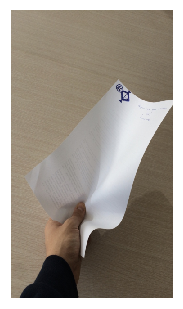

In [133]:
if not osp.exists(RAW_PATH):
    print(f'Wrong input path {RAW_PATH}')
    raise FileNotFoundError

raw_files = sorted([f for f in os.listdir(RAW_PATH) if osp.isfile(osp.join(RAW_PATH, f))])
print(f'Found {len(raw_files)} files in {RAW_PATH}')

for i in range(199, 200):
    print(f'Example: {raw_files[i]}')
    raw_img = cv2.imread(osp.join(RAW_PATH, raw_files[i]))
    print(f'Has shape: {raw_img.shape}')
    print(f'Scaled down to ({HEIGHT}, {WIDTH}) for convenient observations')
    raw_img = cv2.resize(raw_img, (WIDTH, HEIGHT), interpolation=cv2.INTER_AREA)
    raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
    show_array(raw_img)

## Check out depth dataset

Found 200 mentioned depth names in ../data/images/depths/depths.h5
Found 200 actual depth images in ../data/images/depths/depths.h5
Example: curved_paper.jpg
Has shape: (1, 640, 368, 1)


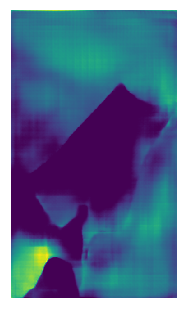

In [134]:
depth_db = h5py.File(DEPTHS_DATASET_PATH, 'r')
depth_names = sorted([n[0].decode() for n in depth_db['names']])

print(f"Found {len(depth_names)} mentioned depth names in {DEPTHS_DATASET_PATH}")
print(f"Found {len(list(depth_db['depths']))} actual depth images in {DEPTHS_DATASET_PATH}")

i = 199

print(f'Example: {depth_names[i]}')
depth_img = np.asarray(depth_db['depths'][depth_names[i]][:])
print(f'Has shape: {depth_img.shape}')

# Display the chosen image
depth_img = np.squeeze(depth_img)
show_array(depth_img)

depth_db.close()

## Check out segmentation dataset

Found 200 mentioned segmentation names in ../data/images/segs/segs.h5
Found 200 actual segmentation images in ../data/images/segs/segs.h5
Example: curved_paper.jpg
Has shape: (1280, 720)


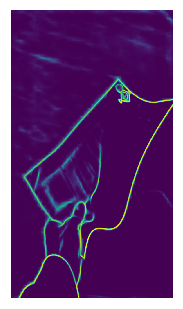

In [135]:
segs_db = h5py.File(SEGS_DATASET_PATH, 'r')
seg_names = sorted([n[0].decode() for n in segs_db['names']])

print(f"Found {len(seg_names)} mentioned segmentation names in {SEGS_DATASET_PATH}")
print(f"Found {len(list(segs_db['ucms']))} actual segmentation images in {SEGS_DATASET_PATH}")

for i in range(199, 200):
    print(f'Example: {seg_names[i]}')
    seg_img = segs_db['ucms'][seg_names[i]][:] 
    print(f'Has shape: {seg_img.shape}')

    # Display the segmentation image
    show_array(seg_img)

segs_db.close()

## Check out labeled dataset 

We have passed the dataset `segs.h5` prepared before as an output of `pytorch-hed/run.py` file. Now we want to get labels and areas (and segments) using `SynthText3/prep_scripts/floodFill.py` script. The script takes the dataset described above as input and returns labeled dataset `labels.h5` as output. Let's see, what we have got at the end:

Found 200 actual segmentation images in ../data/images/labels/labels.h5
Example: curved_paper.jpg
Has shape: (1278, 718)


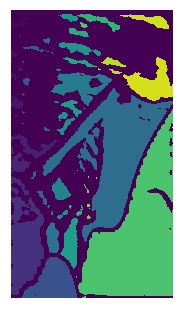

In [136]:
labels_db = h5py.File(LABELS_DATASET_PATH, 'r')
label_names = sorted(list(labels_db['mask']))

print(f"Found {len(label_names)} actual segmentation images in {LABELS_DATASET_PATH}")

for i in range(199, 200):
    print(f'Example: {label_names[i]}')
    label_img = labels_db['mask'][label_names[i]][:] 
    print(f'Has shape: {label_img.shape}')

    # Display the labeled image
    show_array(label_img)

labels_db.close()

## Check out output dataset

Found 173 actual output images in ../data/images/results/SynthText.h5
Example: DSC07562.JPG_0
Has shape: (640, 368, 3)


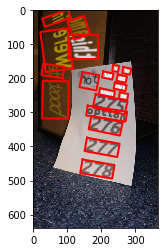

Example: DSC07563.JPG_0
Has shape: (640, 368, 3)


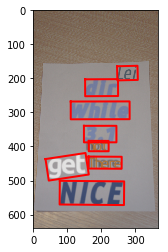

Example: curved_paper.jpg_0
Has shape: (640, 368, 3)


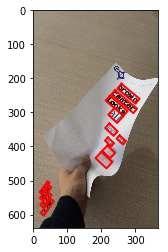

In [143]:
out_db = h5py.File(OUTPUT_DATASET_PATH, 'r')
out_names = sorted(list(out_db['data']))
print(f"Found {len(out_names)} actual output images in {OUTPUT_DATASET_PATH}")

def viz_textbb(fignum,text_im, bb_list,alpha=1.0):
    """ 
    text_im : image containing text
    bb_list : list of 2x4xn_i boundinb-box matrices
    """ 
    plt.close(fignum)        
    plt.figure(fignum)
    plt.imshow(text_im)
    
    H,W = text_im.shape[:2]
    for i in range(len(bb_list)):
        bbs = bb_list[i]
        ni = bbs.shape[-1]
        for j in range(ni):
            bb = bbs[:,:,j]
            bb = np.c_[bb,bb[:,0]]
            plt.plot(bb[0,:], bb[1,:], 'r', linewidth=2, alpha=alpha)
    plt.gca().set_xlim([0,W-1])
    plt.gca().set_ylim([H-1,0])
    plt.show(block=False)

for i in range(170, 173):
    print(f'Example: {out_names[i]}')
    out_img = out_db['data'][out_names[i]][:] 
    print(f'Has shape: {out_img.shape}')

    # Draw bboxes around words
    out_img_rects = out_img.copy()
    boxes = out_db['data'][out_names[i]].attrs['wordBB']
    
    viz_textbb(1, out_img, [boxes], alpha=1.0)

In [144]:
out_db.visititems(print_attrs)

data
data/DSC07339.JPG_0
    charBB: [[[ 91.02754879 102.88966476 110.74796607 122.90465384 136.29850426
   148.7426169  162.59231122 172.434609   188.06342887 177.76239591
   187.00867746 217.85221264 110.11682158 123.33533427 136.91743071
    90.59565107  97.57198428 103.82663584 114.35415536  83.96545817
   106.37698574 120.63359441 133.43904738 138.30717536 177.51754291
   191.64018487 202.77908018 209.84469391 230.92653661 244.75166627
   257.39449333 279.64676914  71.17404636  80.43115823  89.31344284
    98.6417189  107.96755561 117.86639591 128.05989532 135.19409792
   146.25605633  69.82510609  79.01077132  88.19473557  96.13349979
   107.5775207  116.75619599 125.93317225 135.68587008 141.22435828
   149.37772901 219.14178171 233.50855577 271.10109799 283.89495141
   303.54172544 148.41010408 152.26043799 169.555169   132.02765876
   142.2107693  148.31963154 161.55291709 172.747553   180.88751808
    59.89263552  71.82984308  80.13592077  81.72688597  94.10872423
   103.8006

    charBB: [[[ 83.14946989  89.43944723  97.70238058 ...  89.31926686 102.25979948
   109.14424614]
  [ 89.0690549   97.70238058 105.95235854 ...  96.93908197 110.13367875
   118.10325149]
  [ 90.78762289  99.00207423 107.20372006 ... 101.21549696 115.30443842
   122.94388245]
  [ 84.91230092  90.78762289  99.00207423 ...  93.82398068 107.75262636
   114.35570062]]

 [[ 27.55039437  31.72690382  31.70049863 ... 446.61148399 454.73949983
   456.50189515]
  [ 27.53383497  31.70049863  31.67413484 ... 448.53370342 456.75518659
   458.79537055]
  [ 46.9890809   46.95092189  46.91282237 ... 435.7431802  439.1473278
   440.9931581 ]
  [ 47.01637383  46.9890809   46.95092189 ... 433.9572538  437.322671
   438.91809528]]]
    txt: [b'too easy. What\nwhat the FBI had\nAnything but...' b'X.I \nthe \nX.PP'
 b'icon' b'What,' b'1500 different'
 b'  escrow services.  \n      banning       \nAdditionally, use of'
 b'not\nAri' b'Lines:' b'Fellow' b'for a long' b'Date: 20 Apr 93']
data/DSC07405.JPG_0


    charBB: [[[213.96428026 223.83570745 233.12015192 244.34587669 262.62574416
   287.35333216 303.58525494 311.95755637 321.10100039 214.05787404
   222.56500729 234.99618502 261.08443119 268.35716117 278.01573148
   284.17727432 294.59864833 230.34615282 238.04179387 247.26123251
   275.7410583  285.35814143 295.82693797 304.47774561  34.3734078
    26.94906158  20.31942491  19.33838965  22.88040214  28.25034115
   187.00826025 200.8155123  220.50205168 241.80529118 250.61572016
   182.02837826 202.64332849 213.53734808 222.7166652  243.41485576
   177.97549013 202.00095028 220.97395802 172.85080804 192.02730013
   216.92238385 226.95518605  13.53975089  37.58481167  45.5557688
    67.76565346  88.46121786 105.89283318 117.96574559  39.88887124
    48.76146724  46.6939287   46.9578571   48.66277386  45.81579257
    39.70351295 154.89589371 172.36455414 188.22724828 197.97657176
   215.18636836 225.22137758 238.55673888 253.1224834   69.75363019
    82.88924206  93.77365978 122.02472

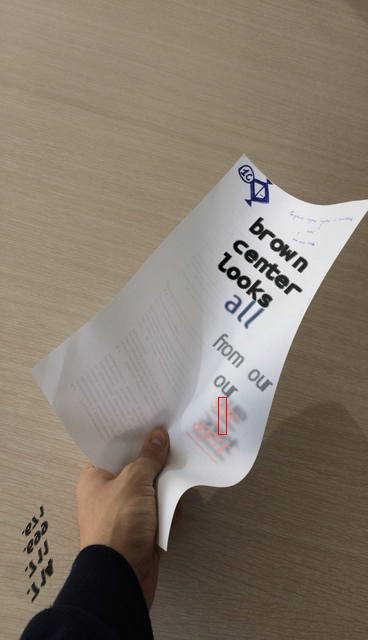

In [148]:
img = out_db['data']['curved_paper.jpg_0'][:]
boxes = out_db['data']['curved_paper.jpg_0'].attrs['wordBB']
boxes = boxes.transpose([2, 1, 0])
rect = boxes[:, [0, 1, 3, 2]][5]
img = cv2.rectangle(img, tuple(rect[0]), tuple(rect[3]), color=(255, 0, 0))
Image.fromarray(img)


In [159]:
def save_synth_data(db):
    box_data = []
    os.makedirs(osp.join(RESULTS_PATH, 'images'), exist_ok=True)
    for index, img_name in enumerate(list(db['data'])):
        Image.fromarray(db['data'][img_name][:]).save(osp.join(RESULTS_PATH, 'images', '%05d.jpg' % index))
        boxes = db['data'][img_name].attrs['wordBB']
        boxes = boxes.transpose([2, 1, 0])
        boxes = boxes[:, [0, 1, 3, 2]]
        box_data.append(boxes)

    with open(osp.join(RESULTS_PATH, 'data.pickle'), 'wb') as f:
        pickle.dump(box_data, f)

In [160]:
save_synth_data(out_db)

with open(osp.join(RESULTS_PATH, 'data.pickle'), 'rb') as f:
    data = pickle.load(f)
data

[array([[[ 91.17093 , 260.62143 ],
         [154.8855  , 271.35764 ],
         [ 88.13761 , 278.62283 ],
         [151.85219 , 289.35904 ]],
 
        [[162.64534 ,  18.378967],
         [210.52672 ,  20.136658],
         [162.25175 ,  29.100368],
         [210.13313 ,  30.858059]],
 
        [[178.08917 ,  31.887741],
         [208.80258 ,  38.87729 ],
         [176.17453 ,  40.3011  ],
         [206.88794 ,  47.29065 ]],
 
        [[217.85788 ,  37.525543],
         [238.27408 ,  38.603134],
         [217.47943 ,  44.695404],
         [237.89563 ,  45.772995]],
 
        [[110.483765, 135.32828 ],
         [147.0972  , 138.00064 ],
         [108.708046, 159.65714 ],
         [145.32149 , 162.3295  ]],
 
        [[ 90.59565 , 169.48744 ],
         [127.24825 , 172.17467 ],
         [ 88.43722 , 198.92772 ],
         [125.08982 , 201.61494 ]],
 
        [[ 84.56094 , 209.88768 ],
         [148.73663 , 214.59645 ],
         [ 82.548   , 237.32204 ],
         [146.7237  , 242.0308  ]],
 

In [163]:
!ls ../data/images/results

data.pickle  images  SynthText.h5


In [165]:
out_db.close()